# Scientific Computing with Python (Second Edition)

# Chapter 11

*We start by importing all from Numpy. As explained in Chapter 01 the examples are written assuming this import is initially done.*
* Due to graphical reasons, we changed the coordinates from the examples given in the book in order to meet
with the browser's typesetting. You are encouraged to modify the locations corresponding to your requirements.
* In Jupyter notebook, you have to restart the kernel when re-executing things, otherwise you might get warnings.

In [1]:
from numpy import *
%matplotlib notebook

## 11.1 A guiding example to widgets

<IPython.core.display.Javascript object>


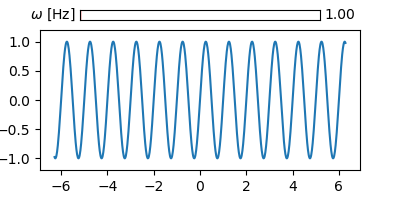

Give a value for $\omega$ between 1 and 5:
1


In [2]:
from matplotlib.pyplot import *
fig = figure(1, figsize = (4,2))
ax = axes([0.1, 0.15, 0.8, 0.7]) # axes for the plot
omega=float(input('Give a value for $\omega$ between 1 and 5:\n'))
x = linspace(-2*pi, 2*pi, 800)
ax.set_ylim(-1.2, 1.2)
lines, = ax.plot(x, sin(2.*pi*omega*x))

In [3]:
from matplotlib.widgets import Slider
sld_ax = axes([0.2, 0.9, 0.6, 0.05]) # axes for slider
sld = Slider(sld_ax, '$\omega$ [Hz]', 1., 5., valinit=1.)
omega=sld.val

In [4]:
def update_frequency(omega):
    lines.set_ydata(np.sin(2.*pi*omega*x))
 
sld.on_changed(update_frequency) 

0

<IPython.core.display.Javascript object>


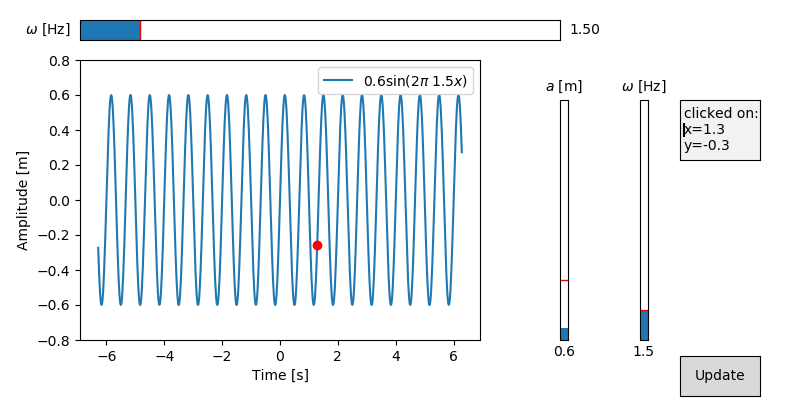

0

In [5]:
from matplotlib.pyplot import *
from matplotlib.widgets import Slider

fig = figure(2, figsize = (8,4))
sld_ax = axes([0.1, 0.9, 0.6, 0.05]) # axes for slider
ax = axes([0.1, 0.15, 0.5, 0.7])     # axes for the plot
ax.xaxis.set_label_text('Time [s]')
ax.yaxis.set_label_text('Amplitude [m]')
sld = Slider(sld_ax, '$\omega$ [Hz]', 1., 5., valinit=1.5)
omega=sld.val
x = linspace(-2*pi, 2*pi, 800)
ax.set_ylim(-1.2, 1.2)
# Plot of the initial curve
# Note, how LaTeX commands and string formatting is combined in the 
# next command
lines, = ax.plot(x, sin(2.*pi*omega*x), label=f'$\sin(2\pi\; {omega} x)$ ')
ax.legend()

def update_frequency(omega):
    lines.set_ydata(np.sin(2.*pi*omega*x))
    # A legend is updated by p text box widget set_varroviding tuples 
    # with line objects and tuples with labels
    ax.legend((lines,),(f'$\sin(2\pi\; {omega} x)$',)) 

    
sld.on_changed(update_frequency)

### 11.1.1 Changing a value with a slider bar

In [6]:
sldo_ax = axes([0.80, 0.15, 0.01, 0.6]) # axes for frequency slider
slda_ax = axes([0.70, 0.15, 0.01, 0.6]) # axes for amplitude slider

In [7]:
sld_omega = Slider(sldo_ax, label='$\omega$ [Hz]', valmin=1., 
 valmax=5., valinit=1.5, valfmt='%1.1f', 
 valstep=0.1, orientation='vertical')
sld_amp = Slider(slda_ax, label='$a$ [m]', valmin=0.5, 
 valmax=2.5, valinit=1.0, valfmt='%1.1f', 
 valstep=0.1, orientation='vertical')

In [8]:
def update_frequency(omega):
    lines.set_ydata(sld_amp.val*sin(2.*pi*omega*x))
    ax.legend((lines,),(f'${sld_amp.val} \sin(2\pi\; {omega} x)$',)) 
 
def update_amplitude(amp):
    lines.set_ydata(amp*sin(2.*pi*sld_omega.val*x))
    ax.legend((lines,),(f'${amp} \sin(2\pi\; {sld_omega.val} x)$',)) 
    ax.set_ylim(-(amp+0.2), amp+0.2)

sld_omega.on_changed(update_frequency)     
sld_amp.on_changed(update_amplitude) 

0

*Note, the changes are visible in the widget, we constructed previously.*

## 11.2 The button widget and mouse events
### 11.2.1 Updating curve parameters with a button


In [9]:
from matplotlib.widgets import Button
button_ax = axes([0.85, 0.01, 0.10, 0.10]) # axes for update button
btn = Button(button_ax, 'Update', hovercolor='red')

In [10]:
def update(event):
    lines.set_ydata(sld_amp.val*sin(2.*pi*sld_omega.val*x))
    ax.legend((lines,),
              (f'${sld_amp.val:1.1f} \sin(2\pi\; \
              {sld_omega.val:1.1f} x)$',)) 
    
btn.on_clicked(update)

0

*Note, the changes are visible in the widget, we constructed previously.*

In [11]:
from matplotlib.widgets import TextBox
textbox_ax=axes([0.85,0.6,0.1,0.15])
txtbx=TextBox(textbox_ax, label='', initial='Clicked on:\nx=--\ny=--')

In [12]:
points, = ax.plot([], [], 'ro')

def onclick(event):
    if event.inaxes == ax:
       txtbx.set_val(
           f'clicked on:\nx={event.xdata:1.1f}\ny={event.ydata:1.1f}')
       if event.button==3:  # Mouse button right
          points.set_xdata([event.xdata])
          points.set_ydata([event.ydata])
    else:
           txtbx.set_val(f'clicked on:\noutside axes\n area')
    fig.canvas.draw_idle() 
cid = fig.canvas.mpl_connect('button_press_event', onclick)

*Note, the changes are visible in the widget, we constructed previously.*
Use the left mouse button to see the coordinates only, use the right button to mark the points with a red dot.